In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logomaker
import pandas as pd

In [19]:
weights = np.array([
    [3.0, 5.0, 0.0, 0.0, 12.0, 1.0, 2.0, 1.0],
    [1.0, 2.0, 10.0, 1.0, 0.0, 1.0, 0.0, 2.0],
    [1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0],
    [7.0, 4.0, 2.0, 11.0, 0.0, 8.0, 9.0, 8.0]
])

weights /= 12

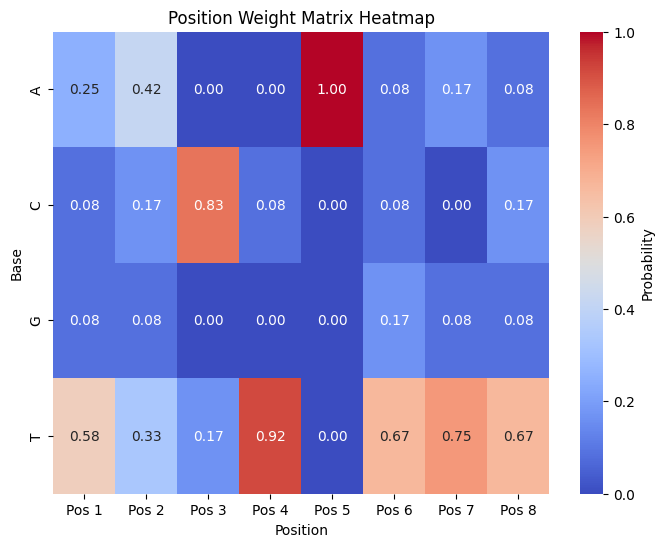

In [20]:
# Example PWM: Rows correspond to bases (A, C, G, T), Columns are positions in a motif
pwm = weights

# Base labels
bases = ['A', 'C', 'G', 'T']
positions = [f"Pos {i+1}" for i in range(pwm.shape[1])]

# Create the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(pwm, annot=True, cmap='coolwarm', cbar_kws={'label': 'Probability'}, 
                 xticklabels=positions, yticklabels=bases, fmt='.2f')

# Add labels and title
plt.title("Position Weight Matrix Heatmap")
plt.xlabel("Position")
plt.ylabel("Base")
plt.show()

PWM DataFrame:
       A     C     G     T
0   0.40  0.17  0.22  0.21
1   0.42  0.18  0.22  0.18
2   0.45  0.16  0.22  0.17
3   0.45  0.16  0.22  0.18
4   0.43  0.15  0.23  0.19
5   0.42  0.15  0.23  0.19
6   0.41  0.15  0.24  0.19
7   0.40  0.16  0.24  0.20
8   0.41  0.15  0.24  0.20
9   0.39  0.14  0.23  0.23
10  0.38  0.13  0.24  0.25


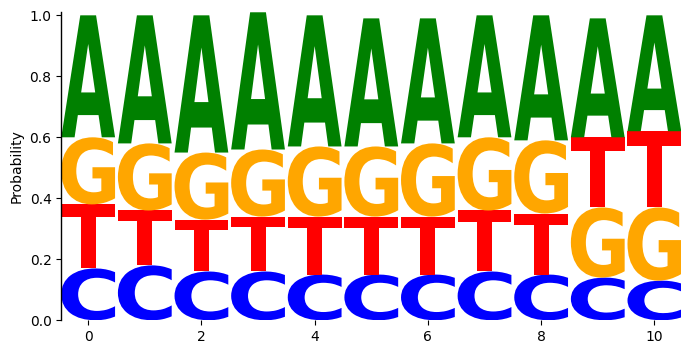

In [22]:
# Input data as a multi-line string
data_str = """
0.40 0.17 0.22 0.21
0.42 0.18 0.22 0.18
0.45 0.16 0.22 0.17
0.45 0.16 0.22 0.18
0.43 0.15 0.23 0.19
0.42 0.15 0.23 0.19
0.41 0.15 0.24 0.19
0.40 0.16 0.24 0.20
0.41 0.15 0.24 0.20
0.39 0.14 0.23 0.23
0.38 0.13 0.24 0.25
"""

# Parse the data into a list of rows
rows = [list(map(float, line.split())) for line in data_str.strip().split('\n')]

# Convert to a DataFrame and label the columns for nucleotides
pwm_df = pd.DataFrame(rows, columns=['A', 'C', 'G', 'T'])

# Print the resulting PWM DataFrame
print("PWM DataFrame:")
print(pwm_df)

# Optional: Save to a CSV if needed
pwm_df.to_csv("pwm_output.csv", index=False)

# Example visualization using Logomaker
import logomaker
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
logo = logomaker.Logo(pwm_df, ax=ax)

# Style the plot
logo.style_spines(visible=False)
logo.style_spines(spines=['left'], visible=True)
logo.ax.set_ylabel('Probability')

# Show the plot
plt.show()